# Ecommerce Data Analysis - SQL + Pandas + Visualizations

## 1. Import Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import warnings
# Suppress Matplotlib UserWarnings (missing glyphs)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Set font to avoid glyph issues
plt.rcParams['font.family'] = 'DejaVu Sans'

## Set plot style

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


## 2. Connect to SQL Server

In [3]:
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=DESKTOP-6SB2VV0;'
    'Database=EcommerceCart;'
    'Trusted_Connection=yes;'
)


In [107]:
import os
# Helper function to save plots
# Use a font that supports all glyphs
import matplotlib
import matplotlib.pyplot as plt
# Ignore matplotlib glyph warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
# Create 'images' folder if not exists
if not os.path.exists('images'):
    os.makedirs('images')

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(f'images/{filename}', bbox_inches='tight')
    plt.show()

## 3. Basic SQL Queries (15 Examples)

In [4]:
# Query 1: Total Customers
total_customers = pd.read_sql("SELECT COUNT(*) AS total_customers FROM customers", conn)
print(total_customers)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2832987363.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_customers = pd.read_sql("SELECT COUNT(*) AS total_customers FROM customers", conn)


   total_customers
0          1000000


In [5]:
# Query 2: Total Orders
total_orders = pd.read_sql("SELECT COUNT(*) AS total_orders FROM orders", conn)
print(total_orders)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1087025587.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_orders = pd.read_sql("SELECT COUNT(*) AS total_orders FROM orders", conn)


   total_orders
0       1000000


In [7]:
# Query 3: Total Revenue
total_revenue = pd.read_sql("SELECT SUM(CAST(total_price AS BIGINT)) AS total_revenue FROM order_items", conn)
print(total_revenue)


   total_revenue
0    55293144055


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3350755863.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_revenue = pd.read_sql("SELECT SUM(CAST(total_price AS BIGINT)) AS total_revenue FROM order_items", conn)


In [8]:
# Query 4: Orders per Customer
orders_per_customer = pd.read_sql("""
SELECT customer_id, COUNT(order_id) AS total_orders
FROM orders
GROUP BY customer_id
""", conn)
print(orders_per_customer.head())


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\4231764597.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_per_customer = pd.read_sql("""


   customer_id  total_orders
0            1             2
1            2             1
2            3             2
3            5             1
4            6             1


In [9]:
# Query 5: Revenue per Customer
revenue_per_customer = pd.read_sql("""
SELECT o.customer_id, SUM(CAST(oi.total_price AS BIGINT)) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY o.customer_id
ORDER BY revenue DESC
""", conn)
print(revenue_per_customer.head())


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1866712532.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_per_customer = pd.read_sql("""


Empty DataFrame
Columns: [customer_id, revenue]
Index: []


In [10]:
# Query 6: Top 10 Products by Revenue
top_products = pd.read_sql("""
SELECT p.product_name, SUM(CAST(oi.total_price AS BIGINT)) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY revenue DESC
""", conn)
print(top_products.head(10))


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\745585130.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products = pd.read_sql("""


             product_name   revenue
0         AirPods Pro 378  16433171
1      Sony Bravia TV 162  16081748
2  Samsung Galaxy S23 442  15947385
3           iPhone 13 474  15167559
4  Samsung Galaxy S23 334  14738879
5      Sony Bravia TV 916  14584987
6  Samsung Galaxy S23 302  14497291
7           iPhone 13 413  14447819
8          HP Spectre 528  14413994
9         MacBook Air 291  14200610


In [11]:
# Query 7: Orders per Month
orders_per_month = pd.read_sql("""
SELECT FORMAT(order_date, 'yyyy-MM') AS month, COUNT(order_id) AS total_orders
FROM orders
GROUP BY FORMAT(order_date, 'yyyy-MM')
ORDER BY month
""", conn)
print(orders_per_month)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2991448202.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_per_month = pd.read_sql("""


      month  total_orders
0   2022-10         14583
1   2022-11         27593
2   2022-12         28171
3   2023-01         28260
4   2023-02         25715
5   2023-03         28488
6   2023-04         27321
7   2023-05         28241
8   2023-06         27509
9   2023-07         28230
10  2023-08         28087
11  2023-09         27435
12  2023-10         28323
13  2023-11         27434
14  2023-12         28276
15  2024-01         28340
16  2024-02         26538
17  2024-03         28420
18  2024-04         27393
19  2024-05         28405
20  2024-06         27389
21  2024-07         28045
22  2024-08         28343
23  2024-09         27384
24  2024-10         28476
25  2024-11         27117
26  2024-12         28139
27  2025-01         28444
28  2025-02         25793
29  2025-03         28269
30  2025-04         27654
31  2025-05         28064
32  2025-06         27300
33  2025-07         28341
34  2025-08         28256
35  2025-09         27551
36  2025-10         12673


In [36]:
# Query 8: Revenue per Category
revenue_per_category = pd.read_sql("""
SELECT TOP 15 c.category_name, SUM(oi.total_price) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY revenue DESC
""", conn)
print(revenue_per_category)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2258886726.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_per_category = pd.read_sql("""


            category_name     revenue
0       Gaming Consoles\r  1131292259
1             Gardening\r  1119068463
2          Collectibles\r  1109541352
3               Watches\r  1108900355
4      Automotive Parts\r  1106722314
5           Video Games\r  1105913392
6               Laptops\r  1102067267
7   Industrial Supplies\r  1097914370
8               Routers\r  1097574758
9     Fitness Equipment\r  1094613844
10    Movies & TV Shows\r  1092228258
11      Storage Devices\r  1091567482
12      Beauty Products\r  1088532130
13       Craft Supplies\r  1086205065
14       Fashion - Kids\r  1079156169


In [14]:
# Query 9: Average Order Value
avg_order_value = pd.read_sql("""
SELECT AVG(CAST(order_total AS BIGINT)) AS avg_order_value
FROM (
    SELECT order_id, SUM(CAST(total_price AS BIGINT)) AS order_total
    FROM order_items
    GROUP BY order_id
) AS sub
""", conn)
print(avg_order_value)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3396002178.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_order_value = pd.read_sql("""


   avg_order_value
0            55293


In [15]:
# Query 10: Payment Methods Distribution
payment_distribution = pd.read_sql("""
SELECT payment_mode, COUNT(*) AS count
FROM payments
GROUP BY payment_mode
""", conn)
print(payment_distribution)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3287328286.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  payment_distribution = pd.read_sql("""


  payment_mode   count
0          UPI  167450
1  Net Banking  166028
2   Debit Card  166065
3  Credit Card  166547
4       Wallet  167144
5          COD  166766


In [19]:
# Query 11: Customers per Country
customers_per_country = pd.read_sql("""
SELECT TOP 50 country, COUNT(*) AS count
FROM customers
GROUP BY country
ORDER BY count DESC
""", conn)
print(customers_per_country)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1505768179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_per_country = pd.read_sql("""


                                              country  count
0         Madurai, Jammu and Kashmir, 879387",India\r      2
1                  Ambattur, Haryana, 316891",India\r      2
2                       Port Michael, TX 70921",USA\r      2
3                         Jamesmouth, MA 01922",USA\r      2
4                 Aligarh, Meghalaya, 612963",India\r      2
5                     Gorakhpur, Goa, 515317",India\r      2
6                        Navarrofurt, PA 96115",USA\r      1
7                     Kulti, Manipur, 555511",India\r      1
8                          Singhview, ID 54519",USA\r      1
9                Chittoor, Jharkhand, 544309",India\r      1
10            Vasai-Virar, Karnataka, 368992",India\r      1
11   Bhatnagar Nagar, Dehradun, Andhra Pradesh, 06...      1
12                  Burhanpur, Assam, 973883",India\r      1
13                  Alexandraborough, PA 69648",USA\r      1
14                 Shivpuri, Gujarat, 030982",India\r      1
15                      

In [20]:
# Query 12: Total Quantity Sold per Product
quantity_per_product = pd.read_sql("""
SELECT TOP 10 p.product_name, SUM(oi.quantity) AS total_quantity
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity DESC
""", conn)
print(quantity_per_product)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2842306671.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quantity_per_product = pd.read_sql("""


             product_name  total_quantity
0           iPhone 13 474             307
1         AirPods Pro 378             305
2          HP Spectre 661             304
3      Sony Bravia TV 162             296
4  Samsung Galaxy S23 442             290
5  Samsung Galaxy S23 334             290
6         MacBook Air 453             289
7          HP Spectre 223             288
8      Sony Bravia TV 145             286
9         AirPods Pro 168             284


In [21]:
# Query 13: Orders by Status
orders_status_count = pd.read_sql("""
SELECT order_status, COUNT(*) AS count
FROM orders
GROUP BY order_status
""", conn)
print(orders_status_count)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3890322649.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_status_count = pd.read_sql("""


  order_status   count
0      Shipped  300156
1     Returned   49743
2    Cancelled   50279
3    Delivered  200366
4       Placed  399456


In [23]:
# Query 14: Stock Remaining per Product
stock_per_product = pd.read_sql("""
SELECT TOP 20 p.product_name, i.stock_remaining
FROM inventory i
JOIN products p ON i.product_id = p.product_id
ORDER BY stock_remaining DESC
""", conn)
print(stock_per_product)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\855202028.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_per_product = pd.read_sql("""


              product_name  stock_remaining
0          PS5 Console 608              999
1            iPhone 14 595              999
2           HP Spectre 107              999
3   Samsung Galaxy S23 569              999
4       Sony Bravia TV 803              999
5          AirPods Pro 385              999
6          AirPods Pro 618              999
7          PS5 Console 895              999
8            iPhone 13 700              999
9            iPhone 13 123              999
10         MacBook Pro 373              999
11           iPhone 13 601              999
12         MacBook Air 310              999
13         PS5 Console 198              999
14         MacBook Pro 166              999
15         AirPods Pro 519              999
16         MacBook Air 281              999
17         PS5 Console 138              999
18         MacBook Pro 192              999
19           iPhone 13 508              999


In [24]:
# Query 15: Shipping Status Distribution
shipping_status_count = pd.read_sql("""
SELECT delivery_status, COUNT(*) AS count
FROM shipping
GROUP BY delivery_status
""", conn)
print(shipping_status_count)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\900226016.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  shipping_status_count = pd.read_sql("""


  delivery_status   count
0      In Transit  333584
1        Returned  333264
2       Delivered  333152


## Total Customers & Total Orders

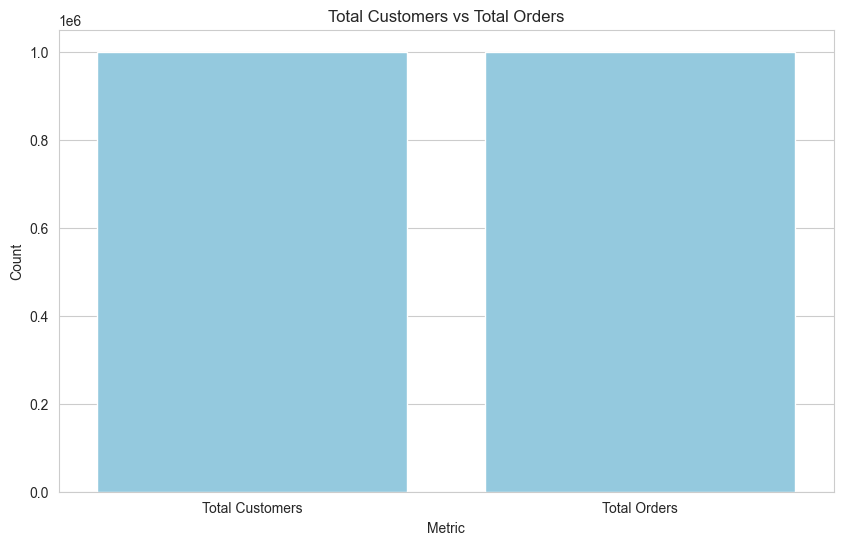

In [26]:
# Total Customers and Total Orders
totals = pd.DataFrame({
    'Metric': ['Total Customers', 'Total Orders'],
    'Count': [total_customers['total_customers'][0], total_orders['total_orders'][0]]
})

sns.barplot(data=totals, x='Metric', y='Count', color='skyblue')
plt.title("Total Customers vs Total Orders")
plt.show()




## Total Revenue

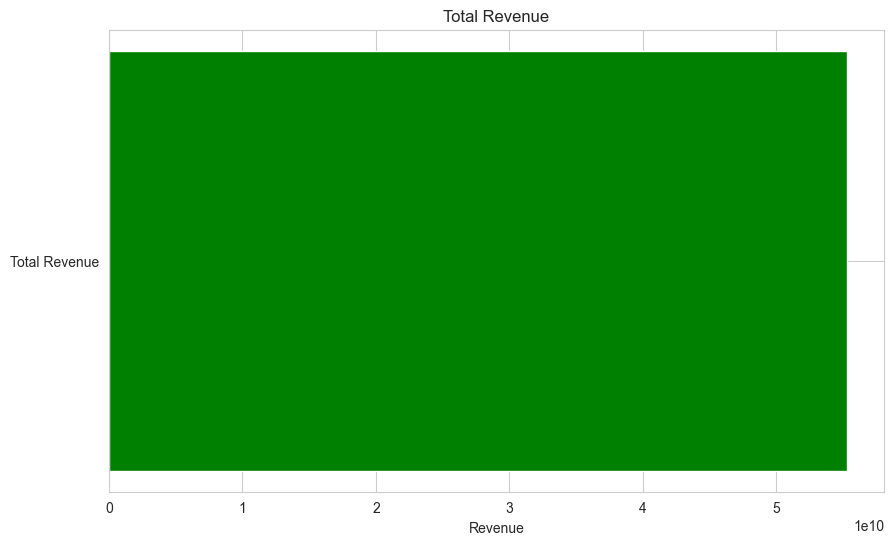

In [27]:
plt.barh(['Total Revenue'], [total_revenue['total_revenue'][0]], color='green')
plt.title("Total Revenue")
plt.xlabel("Revenue")
plt.show()


## Orders per Customers

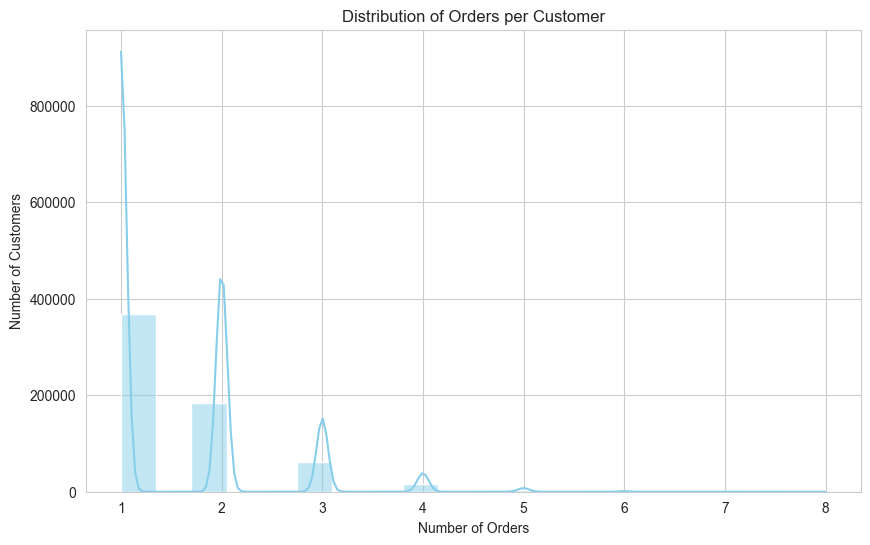

In [28]:
sns.histplot(orders_per_customer['total_orders'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.show()


## Revenue per Customer (Query 5)

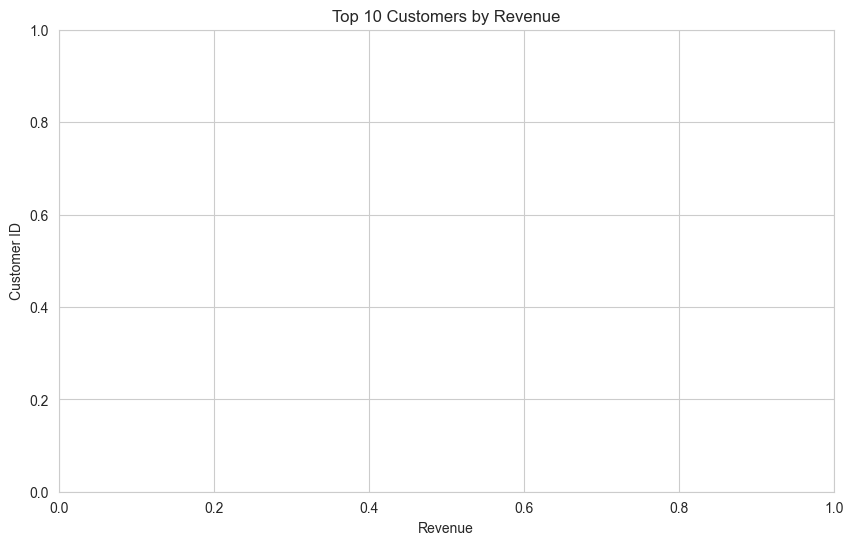

In [29]:
top_revenue_customers = revenue_per_customer.head(10)
sns.barplot(data=top_revenue_customers, x='revenue', y='customer_id', palette='viridis')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.show()


## Top Products by Revenue (Query 6)

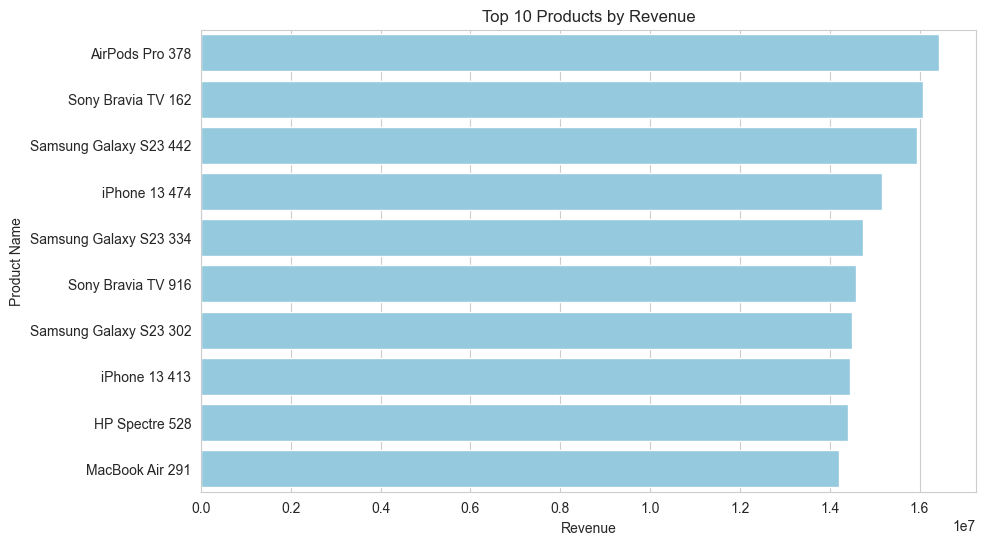

In [32]:
sns.barplot(data=top_products.head(10), x='revenue', y='product_name', color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.show()


## Orders per Month (Query 7)

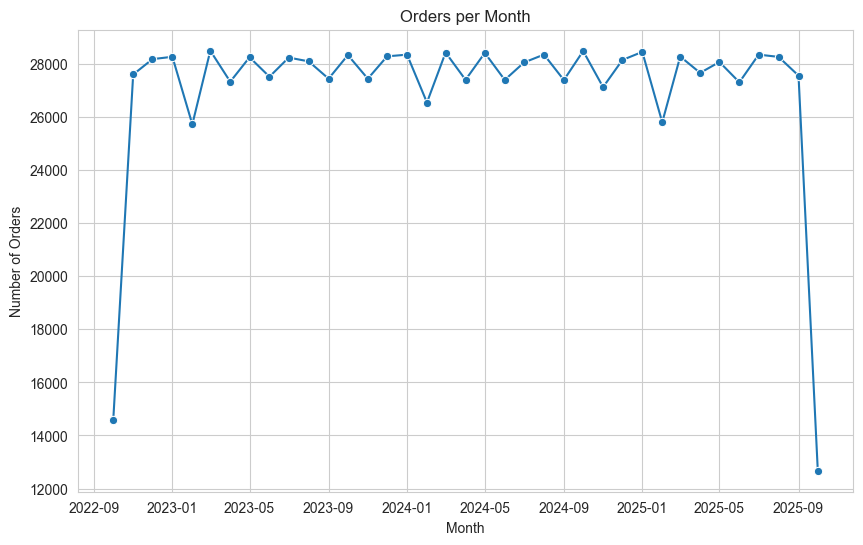

In [33]:
orders_per_month['month'] = pd.to_datetime(orders_per_month['month'])
sns.lineplot(data=orders_per_month, x='month', y='total_orders', marker='o')
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


## Revenue per Category (Query 8)

) missing from font(s) Arial.nalysis\Data-Analysis-Ecommerce\data-analysis-1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


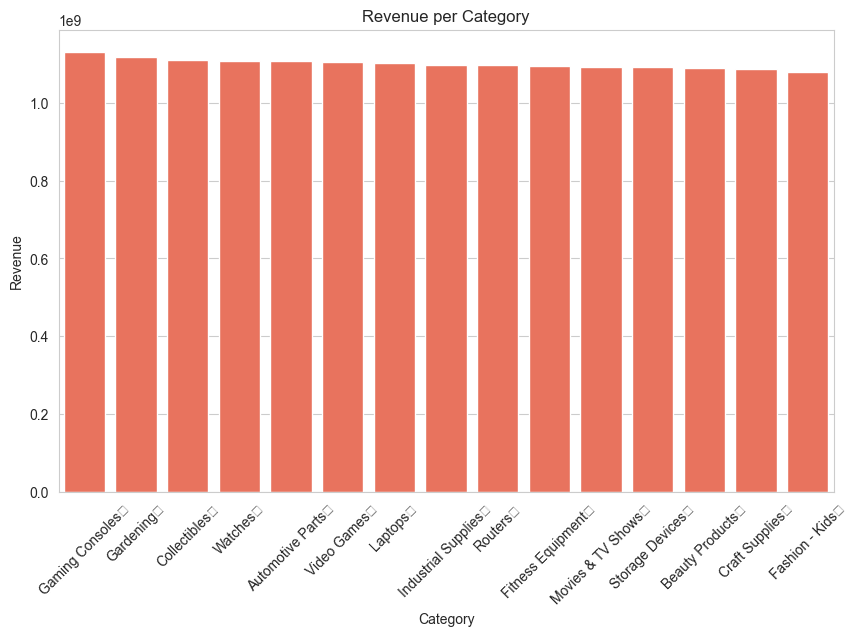

In [37]:
sns.barplot(data=revenue_per_category, x='category_name', y='revenue', color='tomato')
plt.title("Revenue per Category")

plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45) 
plt.show()


## Payment Methods Distribution (Query 10)

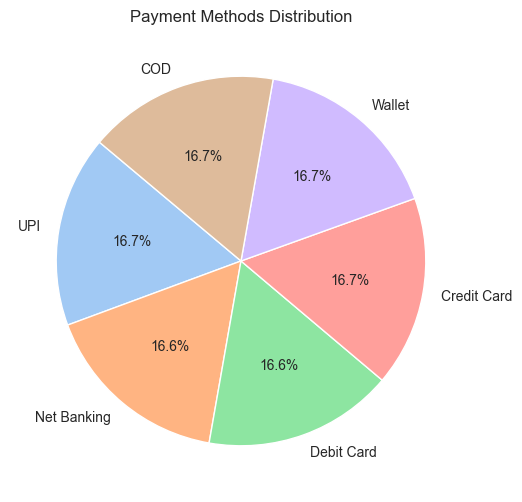

In [38]:
plt.pie(payment_distribution['count'], labels=payment_distribution['payment_mode'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Payment Methods Distribution")
plt.show()


## Customers per Country (Query 11)

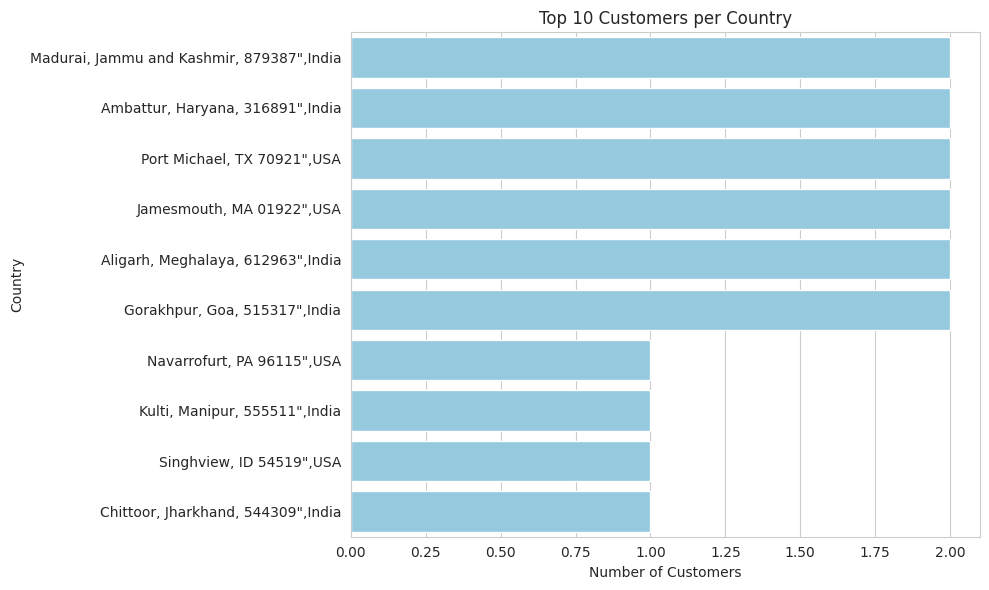

In [41]:
plt.rcParams["font.family"] = "DejaVu Sans"

customers_per_country['country'] = customers_per_country['country'].str.replace(r'[\r\n]', '', regex=True).str.strip()

sns.barplot(data=customers_per_country.head(10), x='count', y='country', color='skyblue')
plt.title("Top 10 Customers per Country")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



## Total Quantity Sold per Product (Query 12)

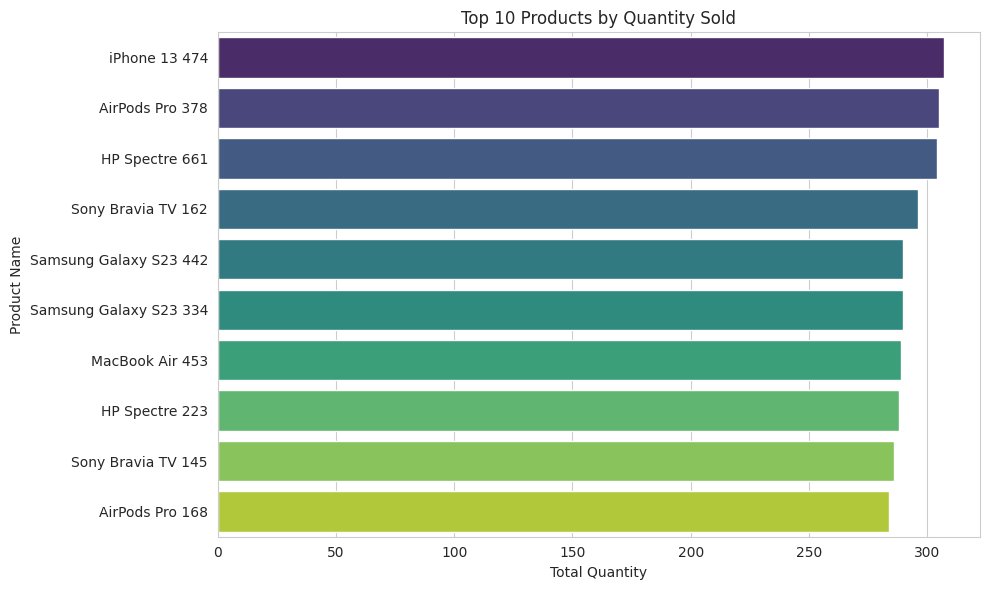

In [43]:
sns.barplot(
    data=quantity_per_product.head(10),
    x='total_quantity',
    y='product_name',
    hue='product_name',   # assign hue to use palette
    dodge=False,
    palette='viridis',
    legend=False          # hide extra legend
)
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()



## Orders by Status (Query 13)

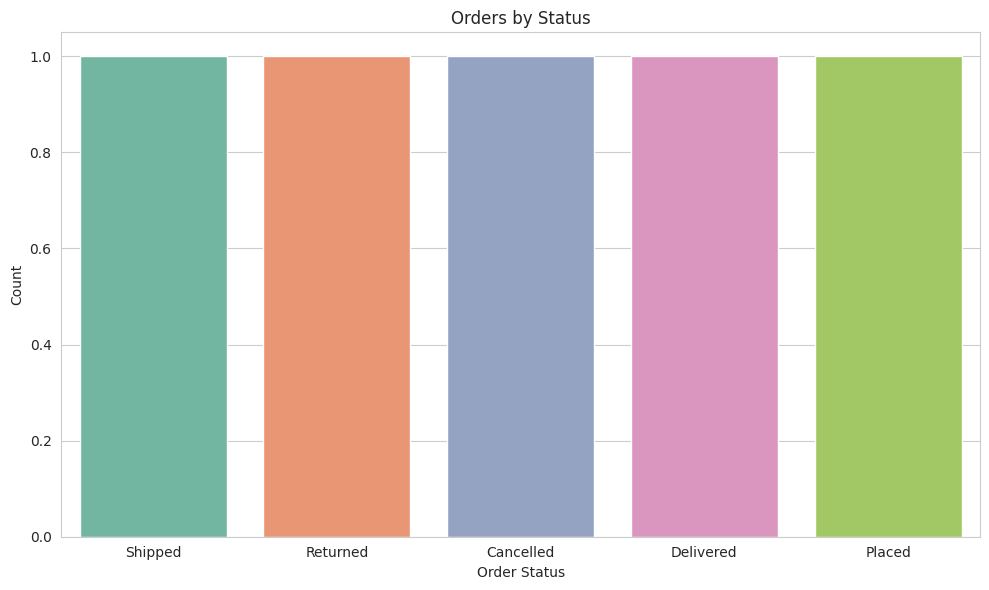

In [45]:
sns.countplot(
    data=orders_status_count,
    x='order_status',
    hue='order_status',   # assign hue
    palette='Set2',
    dodge=False,
    legend=False          # hides duplicate legend
)
plt.title("Orders by Status")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Stock Remaining per Product (Query 14)

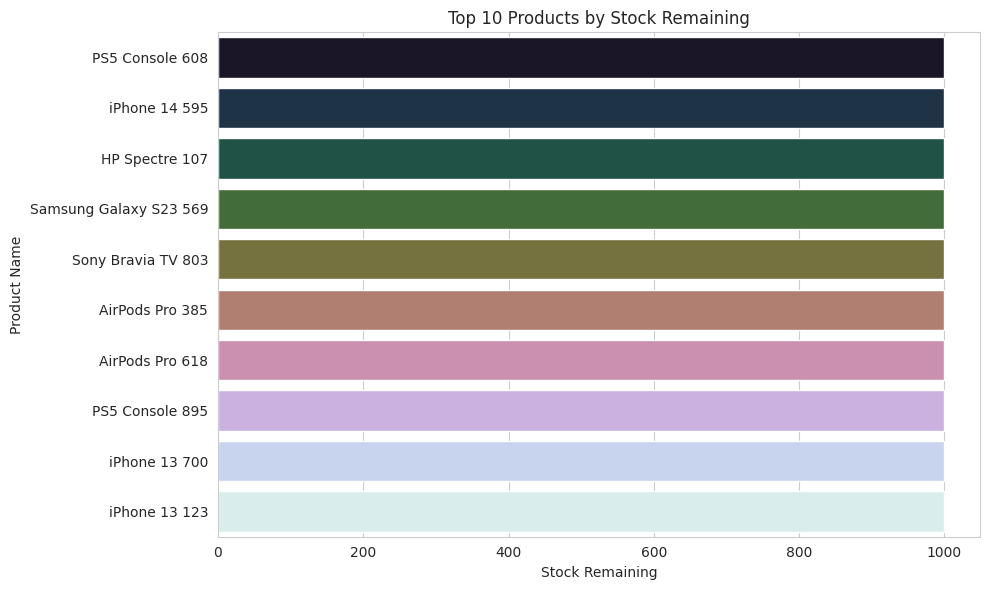

In [47]:
sns.barplot(
    data=stock_per_product.head(10),
    x='stock_remaining',
    y='product_name',
    hue='product_name',   # assign hue to use palette
    dodge=False,
    palette='cubehelix',
    legend=False          # hide extra legend
)
plt.title("Top 10 Products by Stock Remaining")
plt.xlabel("Stock Remaining")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


## Shipping Status Distribution (Query 15)

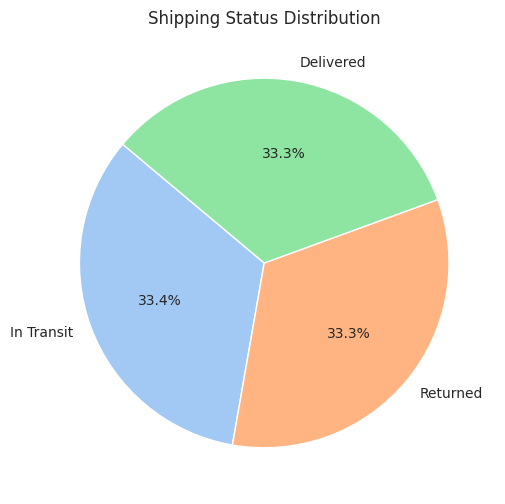

In [48]:
plt.pie(shipping_status_count['count'], labels=shipping_status_count['delivery_status'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Shipping Status Distribution")
plt.show()


## Medium SQL Queries (15 Examples)

In [ ]:
# Query 16: Top Customers by Revenue > 500
top_customers = pd.read_sql("""
SELECT TOP 10 order_item_id, SUM(CAST(total_price AS BIGINT)) AS revenue
FROM order_items
GROUP BY order_item_id
HAVING SUM(CAST(total_price AS BIGINT)) > 500
ORDER BY revenue DESC
""", conn)
print(top_customers)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1310201572.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers = pd.read_sql("""


   order_item_id  revenue
0         769251   299517
1         546286   299058
2          42735   298593
3         956639   298353
4         377422   298245
5         256670   298155
6         662386   298086
7         552472   298032
8         540815   298017
9         573668   297825


In [56]:
monthly_orders = pd.read_sql("""
SELECT TOP 10 FORMAT(order_date,'yyyy-MM') AS month, COUNT(order_id) AS total_orders
FROM orders
GROUP BY FORMAT(order_date,'yyyy-MM')
ORDER BY month
""", conn)

print(monthly_orders)




C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1925634411.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_orders = pd.read_sql("""


     month  total_orders
0  2022-10         14583
1  2022-11         27593
2  2022-12         28171
3  2023-01         28260
4  2023-02         25715
5  2023-03         28488
6  2023-04         27321
7  2023-05         28241
8  2023-06         27509
9  2023-07         28230


In [58]:
# Query 18: Revenue per Seller (fixed)
revenue_per_seller = pd.read_sql("""
SELECT TOP 10 p.seller_id, SUM(CAST(oi.total_price AS BIGINT)) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.seller_id
ORDER BY revenue DESC
""", conn)

print(revenue_per_seller)



C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3234410296.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_per_seller = pd.read_sql("""


   seller_id    revenue
0        500  139447795
1         72  134433610
2        385  133635708
3        284  132071659
4        143  131899027
5        181  131298081
6        302  130590316
7        268  130478536
8        346  130410715
9          8  129806684


In [61]:
# Query 19: Orders per Category (ignoring month for now)
category_orders = pd.read_sql("""
SELECT TOP 10 c.category_name, COUNT(oi.order_id) AS total_orders
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY total_orders DESC
""", conn)

print(category_orders)



C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3889510953.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_orders = pd.read_sql("""


         category_name  total_orders
0          Gardening\r         20119
1    Gaming Consoles\r         19970
2        Video Games\r         19945
3            Laptops\r         19878
4    Storage Devices\r         19819
5       Collectibles\r         19792
6      Wearable Tech\r         19759
7  Movies & TV Shows\r         19720
8            Routers\r         19685
9  Sports & Outdoors\r         19624


In [63]:
# Query 20: Average Revenue per Category
avg_revenue_category = pd.read_sql("""
SELECT TOP 12 c.category_name, AVG(oi.total_price) AS avg_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY avg_revenue DESC
""", conn)
print(avg_revenue_category)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2172653613.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_revenue_category = pd.read_sql("""


               category_name  avg_revenue
0                  Watches\r        57095
1        Fitness Equipment\r        56721
2          Gaming Consoles\r        56649
3         Automotive Parts\r        56627
4                  Jewelry\r        56230
5           Craft Supplies\r        56210
6                 Speakers\r        56092
7             Collectibles\r        56060
8      Industrial Supplies\r        55958
9          Beauty Products\r        55919
10     Musical Instruments\r        55866
11  Health & Personal Care\r        55801


In [64]:
# Query 21: Top Selling Products by Quantity
top_selling_products = pd.read_sql("""
SELECT TOP 10 p.product_name, SUM(oi.quantity) AS total_quantity
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_quantity DESC
""", conn)
print(top_selling_products)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2805606092.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_selling_products = pd.read_sql("""


             product_name  total_quantity
0           iPhone 13 474             307
1         AirPods Pro 378             305
2          HP Spectre 661             304
3      Sony Bravia TV 162             296
4  Samsung Galaxy S23 334             290
5  Samsung Galaxy S23 442             290
6         MacBook Air 453             289
7          HP Spectre 223             288
8      Sony Bravia TV 145             286
9         AirPods Pro 168             284


In [65]:
# Query 22: Customers with >5 Orders
customers_gt5_orders = pd.read_sql("""
SELECT customer_id, COUNT(order_id) AS total_orders
FROM orders
GROUP BY customer_id
HAVING COUNT(order_id) > 5
""", conn)
print(customers_gt5_orders.head())


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\42419794.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_gt5_orders = pd.read_sql("""


   customer_id  total_orders
0         2598             6
1         3587             6
2         6959             6
3         7723             6
4         8686             6


In [68]:
# Average Order Value per Order (ignoring month)
avg_order_per_order = pd.read_sql("""
SELECT AVG(order_total) AS avg_order_value
FROM (
    SELECT order_id, SUM(CAST(total_price AS DECIMAL(20,2))) AS order_total
    FROM order_items
    GROUP BY order_id
) AS sub

""", conn)

print(avg_order_per_order)



C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2923089372.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_order_per_order = pd.read_sql("""


   avg_order_value
0     55293.144055


In [69]:
# Query 24: Payment Method per Month
payment_monthly = pd.read_sql("""
SELECT FORMAT(p.payment_date,'yyyy-MM') AS month, p.payment_mode, COUNT(*) AS count
FROM payments p
GROUP BY FORMAT(p.payment_date,'yyyy-MM'), p.payment_mode
ORDER BY month
""", conn)
print(payment_monthly.head())


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\2158342447.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  payment_monthly = pd.read_sql("""


     month payment_mode  count
0  2022-10   Debit Card   2205
1  2022-10  Net Banking   2171
2  2022-10       Wallet   2238
3  2022-10  Credit Card   2208
4  2022-10          UPI   2154


In [70]:
# Query 25: Returns vs Delivered
returns_delivered = pd.read_sql("""
SELECT 
SUM(CASE WHEN return_date IS NOT NULL THEN 1 ELSE 0 END) AS returned,
SUM(CASE WHEN return_date IS NULL THEN 1 ELSE 0 END) AS delivered
FROM shipping
""", conn)
print(returns_delivered)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\742875579.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  returns_delivered = pd.read_sql("""


   returned  delivered
0   1000000          0


In [73]:

# Query 26: Revenue per Country
revenue_per_country = pd.read_sql("""
SELECT TOP 11 c.country, SUM(CAST(oi.total_price AS DECIMAL(20,2))) AS revenue
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.country
ORDER BY revenue DESC
""", conn)
print(revenue_per_country)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\943132256.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_per_country = pd.read_sql("""


                                              country revenue
0                       North Kimton, ND 01357",USA\r    None
1                Bhusawal, Meghalaya, 920598",India\r    None
2                   Aligarh, Haryana, 574532",India\r    None
3                          Lake Paul, UT 50526",USA\r    None
4                    Tiruppur, Delhi, 144081",India\r    None
5                Khandwa, Tamil Nadu, 379482",India\r    None
6                 West Christinatown, NE 81628",USA\r    None
7    Deshmukh Road, Noida, Chhattisgarh, 951005",I...    None
8    Taneja Zila, Shimla, Madhya Pradesh, 124734",...    None
9                       West Shannon, MH 08626",USA\r    None
10                 East Michaelmouth, IN 73518",USA\r    None


In [76]:
# Query 27: Low Stock Products (<50 units)
low_stock = pd.read_sql("""
SELECT TOP 10 p.product_name, i.stock_remaining
FROM inventory i
JOIN products p ON i.product_id = p.product_id
WHERE i.stock_remaining < 50
ORDER BY stock_remaining ASC
""", conn)
print(low_stock)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\3146318849.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_stock = pd.read_sql("""


      product_name  stock_remaining
0  AirPods Pro 135               10
1  AirPods Pro 148               10
2  AirPods Pro 312               10
3  AirPods Pro 414               10
4  AirPods Pro 542               10
5  AirPods Pro 571               10
6  AirPods Pro 597               10
7  AirPods Pro 693               10
8  AirPods Pro 735               10
9     Dell XPS 107               10


In [78]:
# Query 28: Top Sellers by Revenue
top_sellers = pd.read_sql("""
SELECT TOP 10 p.seller_id, SUM(oi.total_price) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.seller_id
ORDER BY revenue DESC
""", conn)
print(top_sellers)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1113824989.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_sellers = pd.read_sql("""


   seller_id    revenue
0        500  139447795
1         72  134433610
2        385  133635708
3        284  132071659
4        143  131899027
5        181  131298081
6        302  130590316
7        268  130478536
8        346  130410715
9          8  129806684


In [79]:
# Query 29: Orders per State
orders_per_state = pd.read_sql("""
SELECT c.state, COUNT(o.order_id) AS total_orders
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.state
ORDER BY total_orders DESC
""", conn)
print(orders_per_state.head())



C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1175819089.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_per_state = pd.read_sql("""


              state  total_orders
0  Himachal Pradesh         17084
1            Punjab         17000
2           Mizoram         16939
3       West Bengal         16910
4         Jharkhand         16875


In [81]:
# Query 30: Revenue per Payment Mode
revenue_payment_mode = pd.read_sql("""
SELECT p.payment_mode, SUM(oi.total_price) AS revenue
FROM payments p
LEFT JOIN order_items oi ON p.order_id = oi.order_id
GROUP BY p.payment_mode
ORDER BY revenue DESC
""", conn)
print(revenue_payment_mode)


C:\Users\Chandra\AppData\Local\Temp\ipykernel_9872\1612136176.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue_payment_mode = pd.read_sql("""


  payment_mode revenue
0       Wallet    None
1          COD    None
2          UPI    None
3  Net Banking    None
4   Debit Card    None
5  Credit Card    None


## Top Customers by Revenue

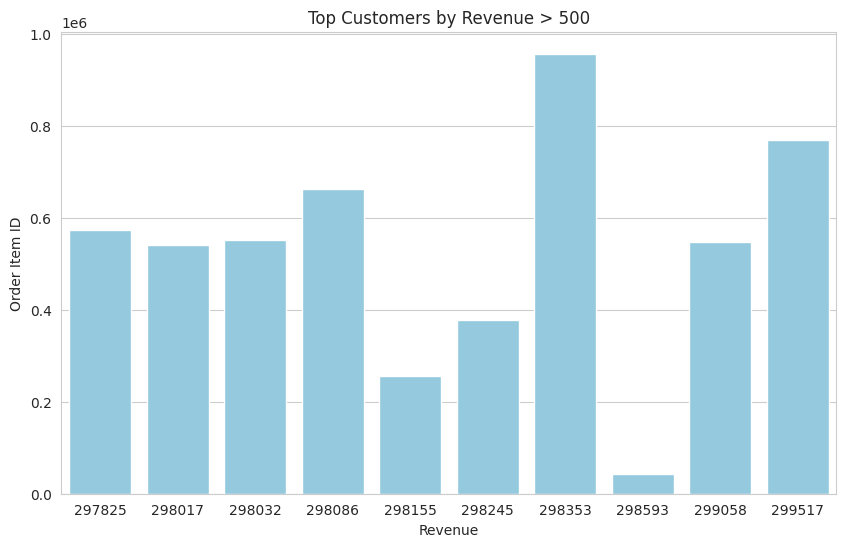

In [82]:
sns.barplot(data=top_customers, x='revenue', y='order_item_id', color='skyblue')
plt.title('Top Customers by Revenue > 500')
plt.xlabel('Revenue')
plt.ylabel('Order Item ID')
plt.show()


## Monthly Orders

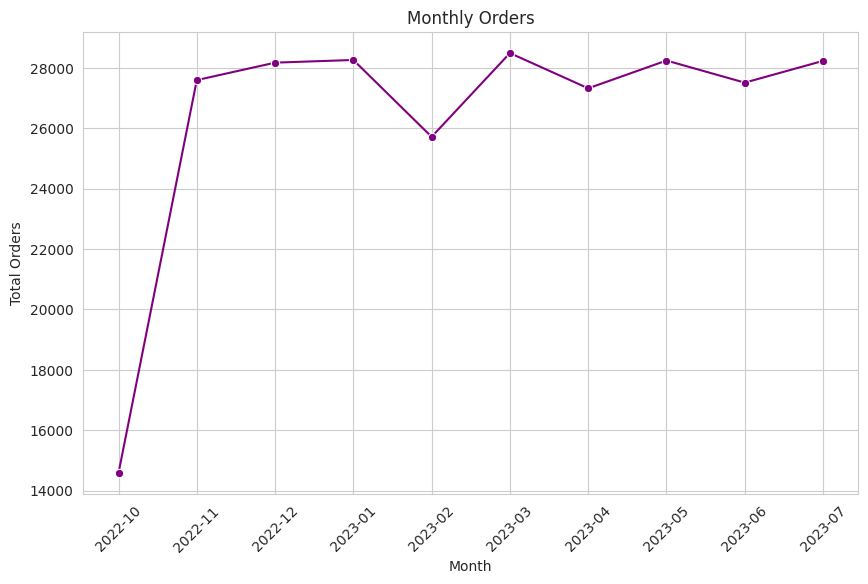

In [83]:
sns.lineplot(data=monthly_orders, x='month', y='total_orders', marker='o', color='purple')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


## Revenue per Seller

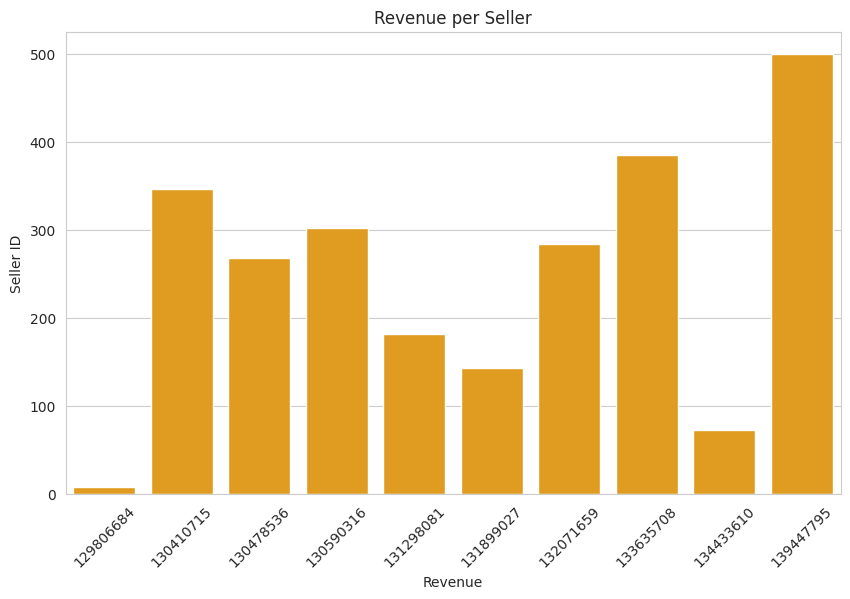

In [86]:
sns.barplot(data=revenue_per_seller, x='revenue', y='seller_id', color='orange')
plt.title('Revenue per Seller')
plt.xlabel('Revenue')
plt.ylabel('Seller ID')
plt.xticks(rotation=45)
plt.show()


## Orders Per Category

) missing from font(s) DejaVu Sans.s\Data-Analysis-Ecommerce\data-analysis-1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


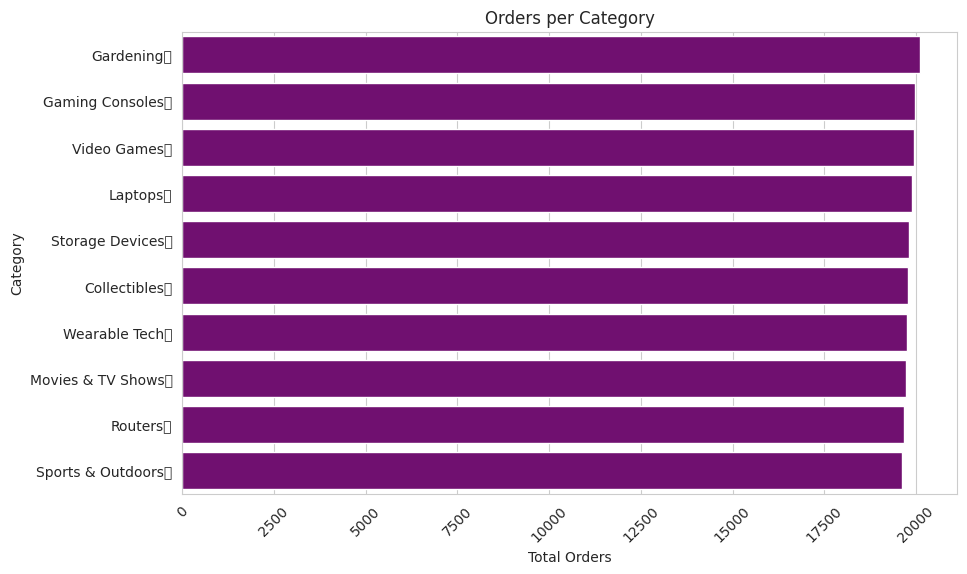

In [87]:
# Query 19: Orders per Category
plt.figure(figsize=(10,6))
sns.barplot(data=category_orders, x='total_orders', y='category_name', color='purple')
plt.title('Orders per Category')
plt.xlabel('Total Orders')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

## Average Revenue per Category

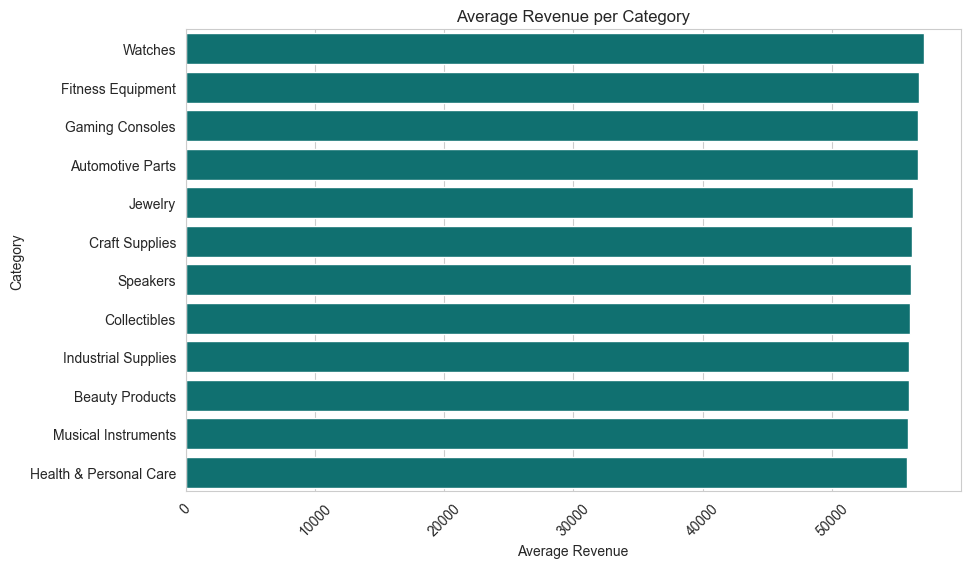

In [90]:
# Query 20: Average Revenue per Category
avg_revenue_category['category_name'] = avg_revenue_category['category_name'].str.replace(r'[\x00-\x1F]', '', regex=True)

# Set a safe font
plt.rcParams['font.family'] = 'Arial'

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_revenue_category, x='avg_revenue', y='category_name', color='teal')
plt.title('Average Revenue per Category')
plt.xlabel('Average Revenue')
plt.ylabel('Category')
plt.xticks(rotation=45)

plt.show()

## Top Selling Products by Quantity

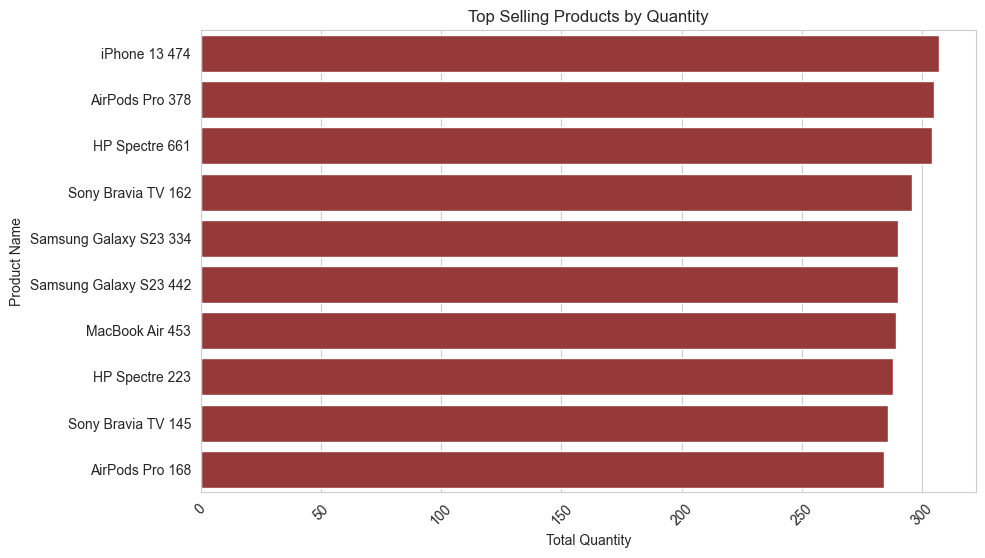

In [91]:
# Query 21: Top Selling Products by Quantity
plt.figure(figsize=(10,6))
sns.barplot(data=top_selling_products, x='total_quantity', y='product_name', color='brown')
plt.title('Top Selling Products by Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.show()

## Customers with >5 Orders

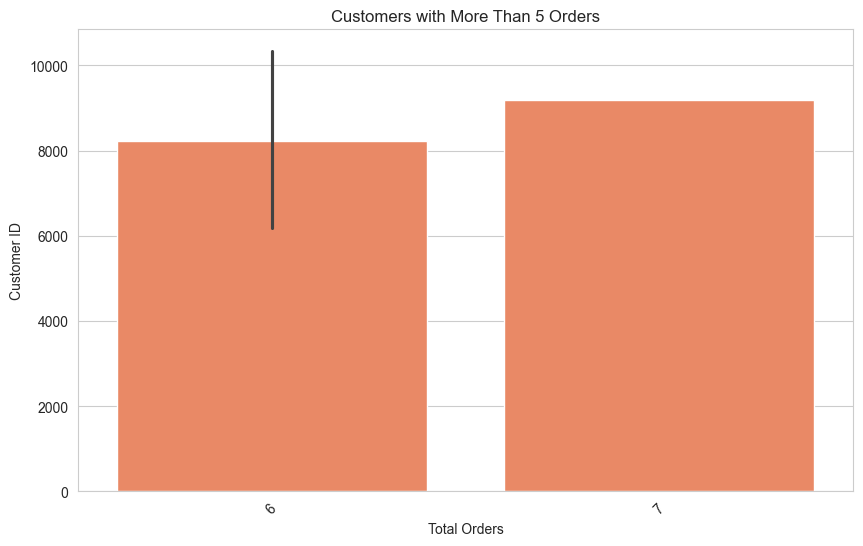

In [92]:
# Query 22: Customers with >5 Orders
plt.figure(figsize=(10,6))
sns.barplot(data=customers_gt5_orders.head(10), x='total_orders', y='customer_id', color='coral')
plt.title('Customers with More Than 5 Orders')
plt.xlabel('Total Orders')
plt.ylabel('Customer ID')
plt.xticks(rotation=45)
plt.show()

## Average Order Value per Order

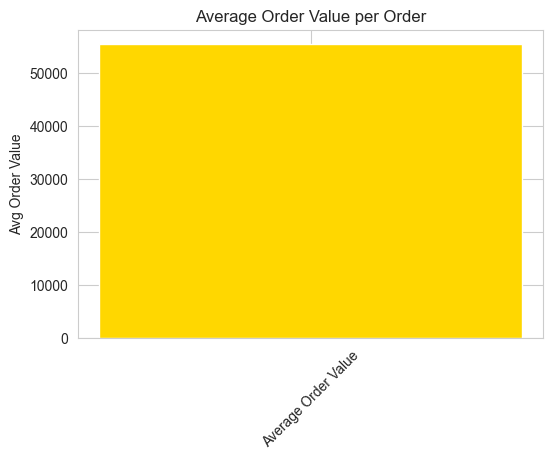

In [93]:
# Query 23: Average Order Value per Order
plt.figure(figsize=(6,4))
plt.bar(x=['Average Order Value'], height=avg_order_per_order['avg_order_value'], color='gold')
plt.title('Average Order Value per Order')
plt.ylabel('Avg Order Value')
plt.xticks(rotation=45)
plt.show()

## Payment Method per Month

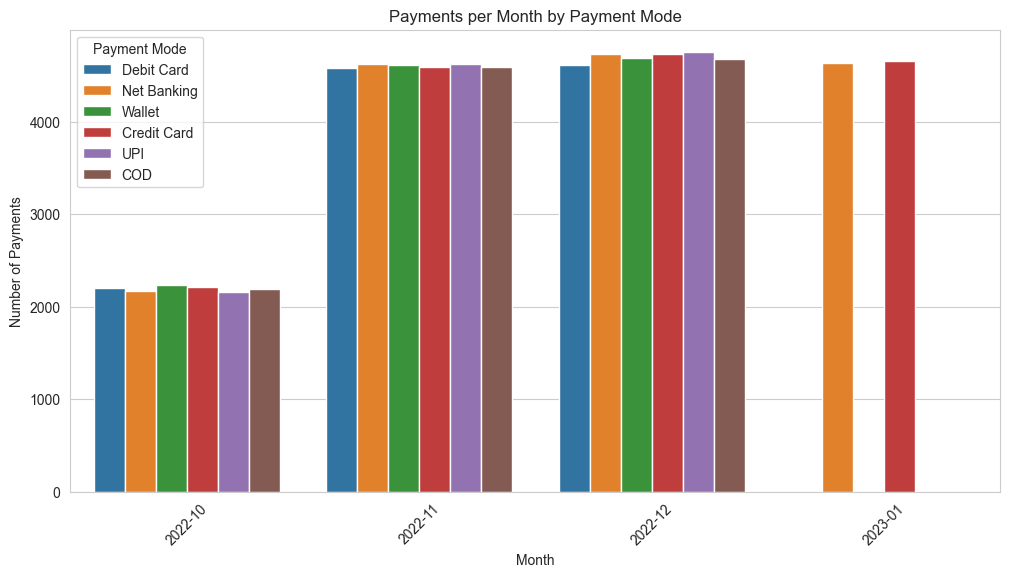

In [94]:
# Query 24: Payment Method per Month
plt.figure(figsize=(12,6))
sns.barplot(data=payment_monthly.head(20), x='month', y='count', hue='payment_mode')
plt.title('Payments per Month by Payment Mode')
plt.xlabel('Month')
plt.ylabel('Number of Payments')
plt.xticks(rotation=45)
plt.legend(title='Payment Mode')
plt.show()

## Returns vs Delivered

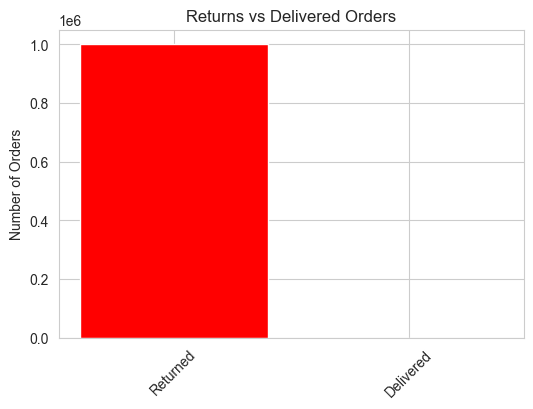

In [95]:
# Query 25: Returns vs Delivered
plt.figure(figsize=(6,4))
plt.bar(['Returned', 'Delivered'], [returns_delivered['returned'][0], returns_delivered['delivered'][0]], color=['red','green'])
plt.title('Returns vs Delivered Orders')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

## Revenue per Country

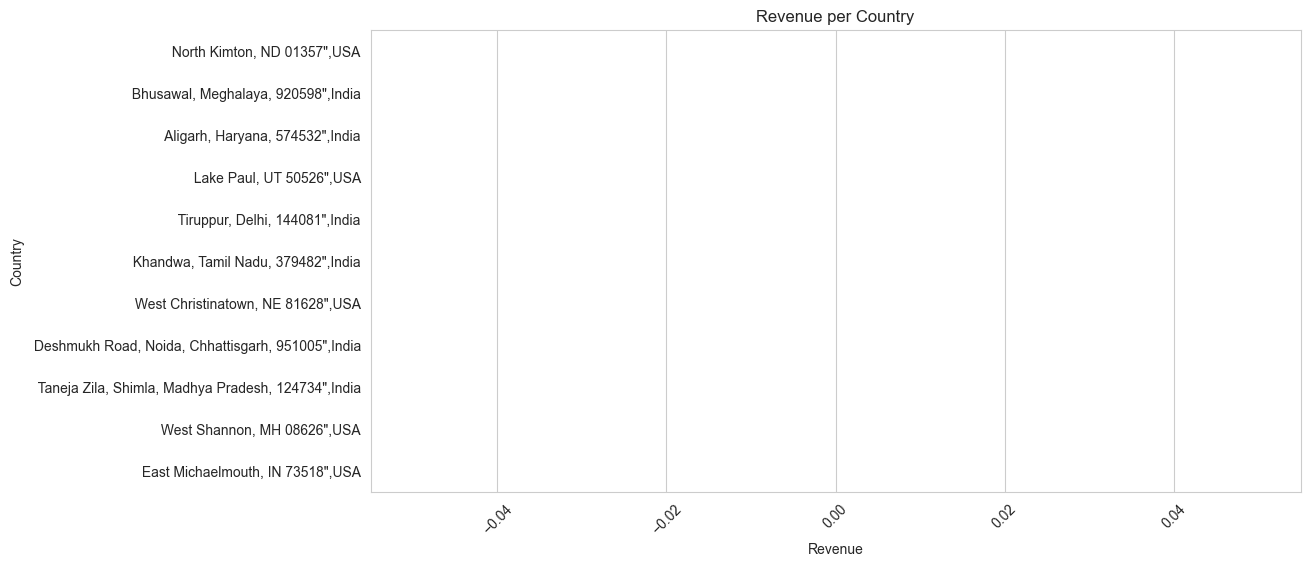

In [97]:
# Query 26: Revenue per Country
# Clean country names to remove invisible/control characters
revenue_per_country['country'] = revenue_per_country['country'].str.replace(r'[\x00-\x1F]', '', regex=True)

# Set font explicitly
plt.rcParams['font.family'] = 'Arial'

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=revenue_per_country, x='revenue', y='country', color='skyblue')
plt.title('Revenue per Country')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

## Low Stock Products (<50 units)

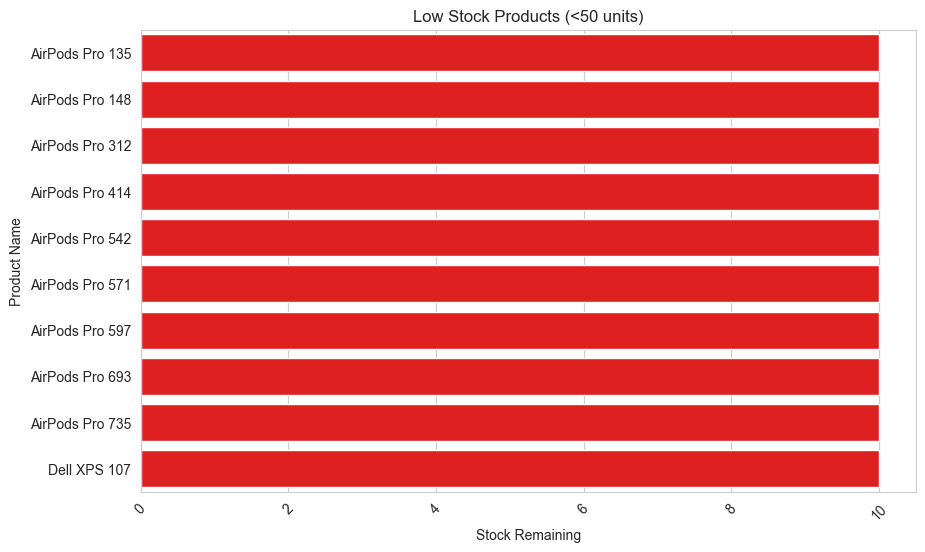

In [98]:
# Query 27: Low Stock Products (<50 units)
plt.figure(figsize=(10,6))
sns.barplot(data=low_stock, x='stock_remaining', y='product_name', color='red')
plt.title('Low Stock Products (<50 units)')
plt.xlabel('Stock Remaining')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.show()

## Top Sellers by Revenue

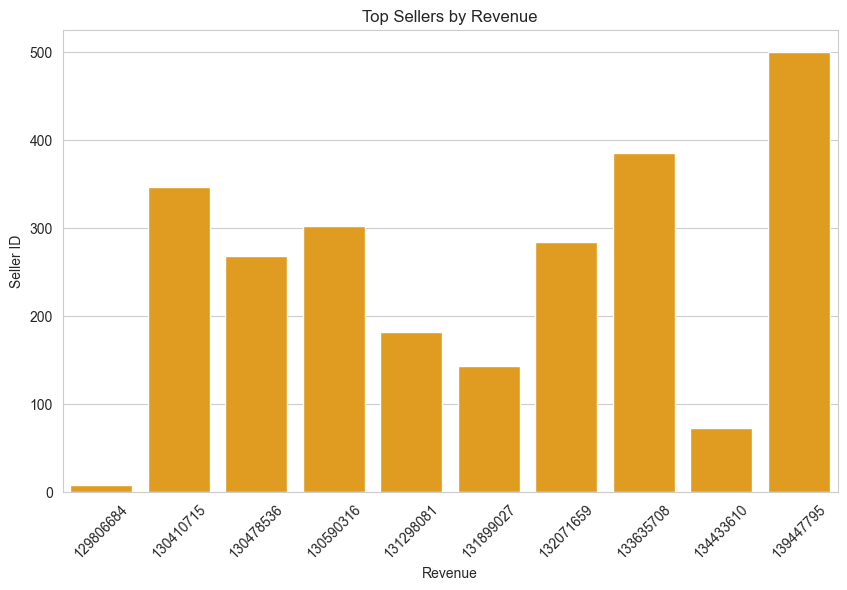

In [99]:
# Query 28: Top Sellers by Revenue
plt.figure(figsize=(10,6))
sns.barplot(data=top_sellers, x='revenue', y='seller_id', color='orange')
plt.title('Top Sellers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Seller ID')
plt.xticks(rotation=45)
plt.show()

## Orders per State

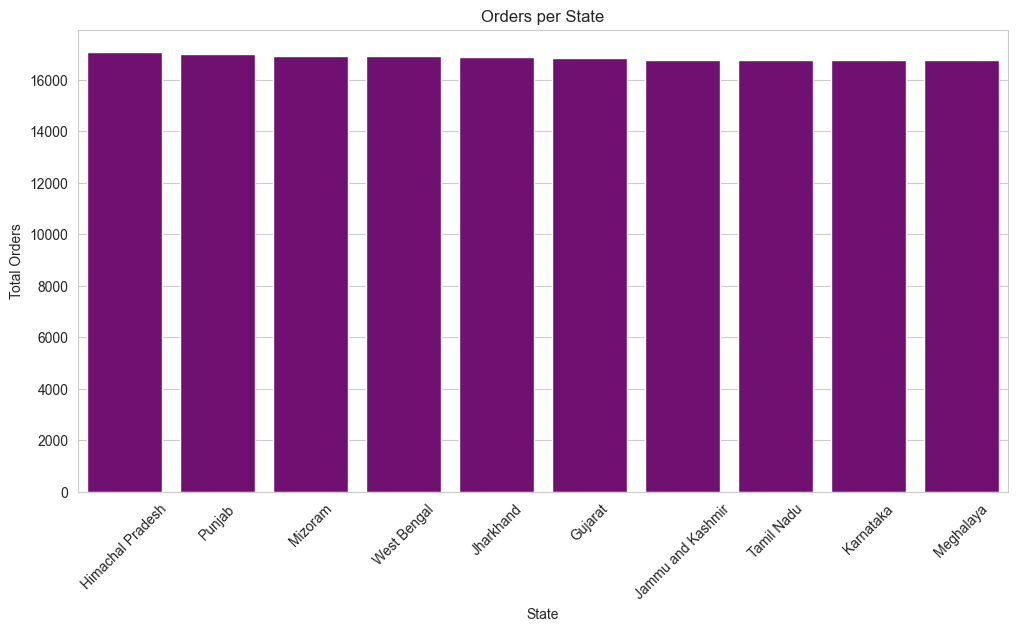

In [100]:
# Query 29: Orders per State
plt.figure(figsize=(12,6))
sns.barplot(data=orders_per_state.head(10), x='state', y='total_orders', color='purple')
plt.title('Orders per State')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


## Revenue per Payment Mode

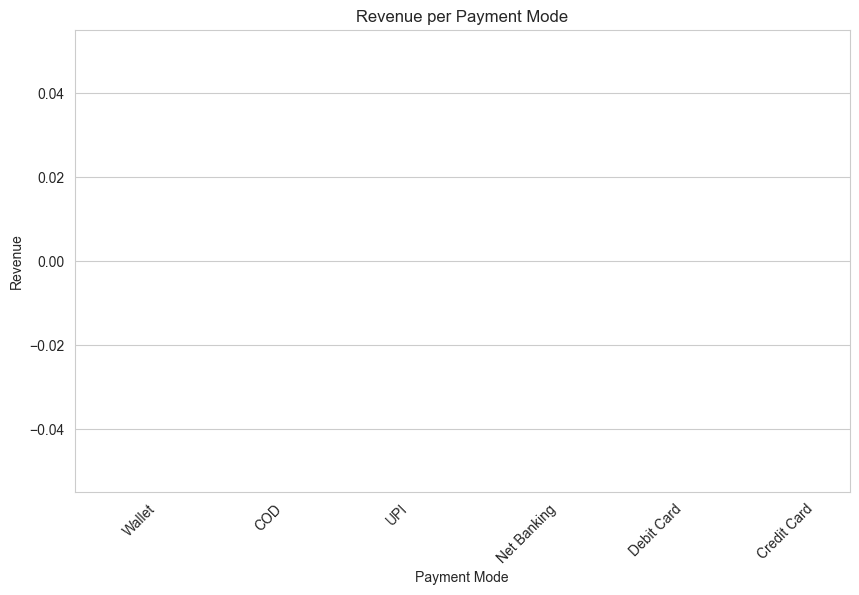

In [101]:
# Query 30: Revenue per Payment Mode
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_payment_mode, x='payment_mode', y='revenue', color='teal')
plt.title('Revenue per Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()